In [32]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [33]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them

X = data.values[:,1:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

All LR feature weights:
[ 0.          0.69310273  0.74889515  0.76485112  0.99703253 -0.21488682
  0.55437203  1.64248906  2.33456278  0.04669199 -1.30159327  1.28968424
 -0.36301494  1.00535739  0.88130844 -0.67541026 -0.72874247 -0.48697947
 -0.3022146  -0.51553419 -0.68374043  1.57371518  1.27606352  1.4843543
  1.41841259  0.62653777  0.90772302  1.25292759  2.36548035  0.88320209]


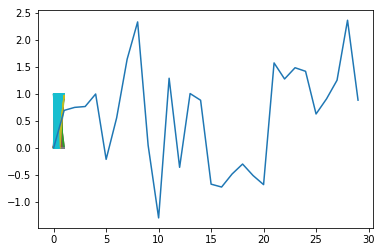

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
svm = SVC()
rfc =RandomForestClassifier()
dt = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
mlp = MLPClassifier(max_iter=250, learning_rate_init=0.1)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('All LR feature weights:')
coef=logreg.coef_[0]
print(coef)
plt.plot(X, Y)
plt.plot(coef)
plt.show()

In [42]:
############### All Features with Scikit-learn Algoritms #################################
print('Accuracy with all features:')
print('\n')
svm.fit(X_train, Y_train)
print('SVM scikit-learn accuracy: {:.2f}'.format(svm.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test)
print(confusion_matrix(Y_test, predictions))
cm = confusion_matrix(Y_test, predictions)
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train, Y_train)
print('RFC scikit-learn accuracy: {:.2f}'.format(rfc.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions2 = rfc.predict(X_test)
print(confusion_matrix(Y_test, predictions2))

dt.fit(X_train, Y_train)
print('DT scikit-learn accuracy: {:.2f}'.format(dt.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions25 = dt.predict(X_test)
print(confusion_matrix(Y_test, predictions25))


nb.fit(X_train, Y_train)
print('GNB scikit-learn accuracy: {:.2f}'.format(nb.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions3 = nb.predict(X_test)
print(confusion_matrix(Y_test, predictions3))
print(classification_report(Y_test, predictions3, target_names=target_names))



knn.fit(X_train, Y_train)
print('KNN scikit-learn accuracy: {:.2f}'.format(knn.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(knn, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions4 = knn.predict(X_test)
print(confusion_matrix(Y_test, predictions4))
print(classification_report(Y_test, predictions4, target_names=target_names))


mlp.fit(X_train, Y_train)
print('MLP scikit-learn accuracy: {:.2f}'.format(mlp.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(mlp, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions5 = mlp.predict(X_test)
print(confusion_matrix(Y_test, predictions5))
print(classification_report(Y_test, predictions5, target_names=target_names))



logreg.fit(X_train, Y_train)
print('LR scikit-learn accuracy: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions5 = logreg.predict(X_test)
print(confusion_matrix(Y_test, predictions5))
print(classification_report(Y_test, predictions5, target_names=target_names))
print('\n')


Accuracy with all features:


SVM scikit-learn accuracy: 95.80 %
Cross Validation Accuracy:
[ 0.90697674  0.96511628  0.92941176  0.96470588  0.94047619]
Accuracy: 0.94 (+/- 0.04)
[[90  0]
 [ 6 47]]
             precision    recall  f1-score   support

     Benign       0.94      1.00      0.97        90
  Malignant       1.00      0.89      0.94        53

avg / total       0.96      0.96      0.96       143

RFC scikit-learn accuracy: 99.30 %
Cross Validation Accuracy:
[ 0.93023256  0.94186047  0.95294118  0.94117647  0.96428571]
Accuracy: 0.95 (+/- 0.02)
Confusion Matrix:
[[90  0]
 [ 1 52]]
DT scikit-learn accuracy: 88.81 %
Cross Validation Accuracy:
[ 0.91860465  0.91860465  0.96470588  0.91764706  0.91666667]
Accuracy: 0.93 (+/- 0.04)
Confusion Matrix:
[[77 13]
 [ 3 50]]
GNB scikit-learn accuracy: 92.31 %
Cross Validation Accuracy:
[ 0.94186047  0.95348837  0.92941176  0.95294118  0.96428571]
Accuracy: 0.95 (+/- 0.02)
Confusion Matrix:
[[85  5]
 [ 6 47]]
             precision    

In [46]:
######################### SelectKBest Features ###################################################

select = feature_selection.SelectKBest(feature_selection.chi2, k=10)
selected2 = select.fit(X_train, Y_train)
X_train_selected2 = selected2.transform(X_train)
X_test_selected2 = selected2.transform(X_test)
print('X_train feature selected shape is: {}'.format(X_train_selected2.shape))
mask = selected2.get_support()
print(mask)
idxs_selected = selected2.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
print(idxs_selected)

############### SelectKBest with Scikit-learn Algoritms #################################

print("Scitkit-learn SelectKBest Features selected:")
print('radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean, radius_worst, perimeter_worst, area_worst, concavity_worst, concave points_worst')
print("\n")

svm.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = rfc.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

dt.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of DT: {:.2f}'.format(dt.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = dt.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

nb.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of NB: {:.2f}'.format(nb.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = nb.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

knn.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(knn, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = knn.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

mlp.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(mlp, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = mlp.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

logreg.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(logreg, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = logreg.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

X_train feature selected shape is: (426, 10)
[False  True False  True  True False False  True  True False False False
 False False False False False False False False False  True False  True
  True False False  True  True False]
[ 1  3  4  7  8 21 23 24 27 28]
Scitkit-learn SelectKBest Features selected:
radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean, radius_worst, perimeter_worst, area_worst, concavity_worst, concave points_worst


The scikit-learn accuracy of SVM: 95.80 %
Cross Validation Accuracy:
[ 0.88372093  0.93023256  0.94117647  0.92941176  0.97619048]
CV Accuracy: 0.93 (+/- 0.06)
[[90  0]
 [ 6 47]]
             precision    recall  f1-score   support

     Benign       0.94      1.00      0.97        90
  Malignant       1.00      0.89      0.94        53

avg / total       0.96      0.96      0.96       143

The scikit-learn accuracy of RFC: 96.50 %
Cross Validation Accuracy:
[ 0.90697674  0.91860465  0.92941176  0.92941176  0.94047619]
CV Accura

In [49]:
################################ SelectFromModel Features #############################################
select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print('Scikit-learn Feature Selection:')
print('X_train shape is: {}'.format(X_train.shape))
print('X_train feature selected shape is: {}'.format(X_train_selected.shape))
print("\n", "These selected features are:")
mask = select.get_support()
print(mask)
idxs_selected = select.get_support(indices=True)
print(idxs_selected)
print("Scitkit-learn Features selected:")
print('area_mean, concavity_mean, concave points_mean, fractal_dimension_mean, radius_se, perimeter_se, radius_worst, texture_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst')
print("\n")

################################ SelectFromModel Algorithms #############################################
print('Accuracy with SelectFromModel feature selection:')

select2 =SelectFromModel(svm, threshold=0.5)
select2.fit(X_train, Y_train)
X_train_selected2 = select.transform(X_train)
X_test_selected2 = select.transform(X_test)
svm.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

select3 =SelectFromModel(rfc, threshold=0.9)
select3.fit(X_train, Y_train)
X_train_selected3 = select.transform(X_train)
X_test_selected3 = select.transform(X_test)
rfc.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = rfc.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

select3 =SelectFromModel(dt, threshold=0.9)
select3.fit(X_train, Y_train)
X_train_selected3 = select.transform(X_train)
X_test_selected3 = select.transform(X_test)
dt.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of DT: {:.2f}'.format(dt.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = dt.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

select4 =SelectFromModel(nb, threshold=0.9)
select4.fit(X_train, Y_train)
X_train_selected4 = select.transform(X_train)
X_test_selected4 = select.transform(X_test)
nb.fit(X_train_selected4, Y_train)
print('The scikit-learn accuracy of NB: {:.2f}'.format(nb.score(X_test_selected4, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = nb.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

select5 =SelectFromModel(knn, threshold=0.9)
select5.fit(X_train, Y_train)
X_train_selected5 = select.transform(X_train)
X_test_selected5 = select.transform(X_test)
knn.fit(X_train_selected5, Y_train)
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test_selected5, Y_test)*100),  '%')
scores = cross_val_score(knn, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = knn.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

select6 =SelectFromModel(mlp, threshold=0.9)
select6.fit(X_train, Y_train)
X_train_selected6 = select.transform(X_train)
X_test_selected6 = select.transform(X_test)
mlp.fit(X_train_selected6, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test_selected6, Y_test)*100),  '%')
scores = cross_val_score(mlp, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = mlp.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
logreg.fit(X_train_selected, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(logreg, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = logreg.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))

Scikit-learn Feature Selection:
X_train shape is: (426, 30)
X_train feature selected shape is: (426, 13)

 These selected features are:
[False False False False  True False False  True  True False  True  True
 False  True False False False False False False False  True  True  True
  True False  True  True  True False]
[ 4  7  8 10 11 13 21 22 23 24 26 27 28]
Scitkit-learn Features selected:
area_mean, concavity_mean, concave points_mean, fractal_dimension_mean, radius_se, perimeter_se, radius_worst, texture_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst


Accuracy with SelectFromModel feature selection:
The scikit-learn accuracy of SVM: 95.80 %
Cross Validation Accuracy:
[ 0.89534884  0.95348837  0.95294118  0.95294118  0.98809524]
Accuracy: 0.95 (+/- 0.06)
[[90  0]
 [ 6 47]]
CV Accuracy: 0.95 (+/- 0.06)
             precision    recall  f1-score   support

     Benign       0.94      1.00      0.97        90
  Malignant       1.00      0.8

In [50]:
chi2_selected = data[['radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean',
                 'area_mean', 'radius_mean', 'concavity_mean', 'concavity_worst', 'area_se', 'perimeter_se', 'compactness_mean']]

X_trainchi, X_test, Y_train, Y_test = train_test_split(chi2_selected, Y, test_size=0.25, random_state=0)
svm = SVC()
rfc =RandomForestClassifier()
dt = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
mlp = MLPClassifier(max_iter=250, learning_rate_init=0.1)
logreg = LogisticRegression()

svm.fit(X_trainchi, Y_train)
score = svm.score(X_test, Y_test)
print("Scikit-learn SVM Accuracy with Chi2 Feature Selection:", score*100, '%')
scores = cross_val_score(svm, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

rfc.fit(X_trainchi, Y_train)
score = rfc.score(X_test, Y_test)
print("Scikit-learn RFC Accuracy with Chi2 Feature Selection:", score*100, '%')
scores = cross_val_score(rfc, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

dt.fit(X_trainchi, Y_train)
score = dt.score(X_test, Y_test)
print("Scikit-learn DT Accuracy with Chi2 Feature Selection:", score*100, '%')
scores = cross_val_score(dt, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

knn.fit(X_trainchi, Y_train)
score = knn.score(X_test, Y_test)
print("Scikit-learn KNN Accuracy with Chi2 Feature Selection:", score*100, '%')
scores = cross_val_score(knn, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

nb.fit(X_trainchi, Y_train)
score = nb.score(X_test, Y_test)
print("Scikit-learn GNB Accuracy with Chi2 Feature Selection:", score*100, '%')
scores = cross_val_score(nb, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

mlp.fit(X_trainchi, Y_train)
score = mlp.score(X_test, Y_test)
print("Scikit-learn MLP Accuracy with Chi2 Feature Selection:", score*100, '%')
scores = cross_val_score(mlp, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


logreg = LogisticRegression()
logreg.fit(X_trainchi, Y_train)
score = logreg.score(X_test, Y_test)
print("Scikit-learn LR Accuracy with Chi2 Selection:", score*100, '%')
scores = cross_val_score(logreg, X_trainchi, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Scikit-learn SVM Accuracy with Chi2 Feature Selection: 62.9370629371 %
Cross Validation Accuracy:
[ 0.62790698  0.62790698  0.62352941  0.62352941  0.63095238]
Accuracy: 0.63 (+/- 0.01)
Scikit-learn RFC Accuracy with Chi2 Feature Selection: 95.8041958042 %
Cross Validation Accuracy:
[ 0.91860465  0.94186047  0.94117647  0.95294118  0.96428571]
Accuracy: 0.94 (+/- 0.03)
Scikit-learn DT Accuracy with Chi2 Feature Selection: 90.9090909091 %
Cross Validation Accuracy:
[ 0.88372093  0.93023256  0.91764706  0.94117647  0.97619048]
Accuracy: 0.93 (+/- 0.06)
Scikit-learn KNN Accuracy with Chi2 Feature Selection: 92.3076923077 %
Cross Validation Accuracy:
[ 0.97674419  0.89534884  0.91764706  0.90588235  0.92857143]
Accuracy: 0.92 (+/- 0.06)
Scikit-learn GNB Accuracy with Chi2 Feature Selection: 93.7062937063 %
Cross Validation Accuracy:
[ 0.93023256  0.90697674  0.89411765  0.90588235  0.95238095]
Accuracy: 0.92 (+/- 0.04)
Scikit-learn MLP Accuracy with Chi2 Feature Selection: 91.6083916084 %


In [9]:
PostLR_L1norm_selection =data[['texture_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se',
                  'perimeter_se', 'compactness_se', 'concavity_se','concave points_se','symmetry_se', 'fractal_dimension_se',
                  'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(PostLR_L1norm_selection, Y, test_size=0.25, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
score = logreg.score(X_test, Y_test)
print("Scikit-learn LR Accuracy with Post-algorithm Feature Selection:", score*100)
scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Scikit-learn LR Accuracy with Post-algorithm Feature Selection: 93.006993007
Cross Validation Accuracy:
[ 0.91860465  0.89534884  0.89411765  0.90588235  0.92857143]
Accuracy: 0.91 (+/- 0.03)


In [ ]:
############### SelectFromPercentile Features #################################
select = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
selected = select.fit(X_train, Y_train)
X_train_selected = selected.transform(X_train)
X_test_selected = selected.transform(X_test)
print('Scikit-learn Feature Selection:')
print('X_train shape is: {}'.format(X_train.shape))
print('X_train feature selected shape is: {}'.format(X_train_selected.shape))
print("\n", "These selected features are:")
mask = select.get_support()
print(mask)
idxs_selected = select.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
print(idxs_selected)

print("Scitkit-learn Features selected by Select Percentile:")
print('concave points_mean, symmetry_mean, radius_worst, perimeter_worst, area_worst, concave points_worst')
print("\n")


############### SelectPercentile with Scikit-learn Algoritms #################################
print('Accuracy with Top 20 Percentile feature selection:')

selected = select.fit(X_train, Y_train)
X_train_selected = selected.transform(X_train)
X_test_selected = selected.transform(X_test)

svm.fit(X_train_selected, Y_train)
print('SVM scikit-learn accuracy: {:.2f}'.format(svm.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train_selected, Y_train)
print('RFC scikit-learn accuracy: {:.2f}'.format(rfc.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = rfc.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

nb.fit(X_train_selected, Y_train)
print('NB scikit-learn accuracy: {:.2f}'.format(nb.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = nb.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

knn.fit(X_train_selected, Y_train)
print('KNN scikit-learn accuracy: {:.2f}'.format(knn.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(knn, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = knn.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

mlp.fit(X_train_selected, Y_train)
print('MLP scikit-learn accuracy: {:.2f}'.format(mlp.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(mlp,X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = mlp.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

logreg.fit(X_train_selected, Y_train)
print('LR scikit-learn accuracy: {:.2f}'.format(logreg.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(logreg,X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = logreg.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))